## Numerical solution of ordinary differential equations: Euler's and Heun's method
As always we start by running some necessary boilerplate code.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

newparams = {'figure.figsize': (6.0, 6.0), 
             'axes.grid': True,
             'lines.markersize': 8, 
             'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

### Euler's method
Now we turn to our first numerical method,
namely
[Euler's method](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger),
known from Mathematics 1.
We quickly review two alternative derivations,
namely one based on *numerical differentiation*
and one on *numerical integration*.

**Derivation of Euler's method.**

Euler's method is the simplest example of a so-called
**one step method (OSM)**.
Given the IVP

$$
y'(t) = f(t,y(t)), \qquad y(t_0)=y_0,
$$

and some final time $T$,
we want to compute to an approximation of $y(t)$
on $[t_0, T]$.

We start from $t_0$ and choose some (usually small) time step size
$\tau_0$ and set the new time $t_1 = t_0 + \tau_0$. The goal is to
compute a value $y_1$ serving as approximation of $y(t_1)$.

To do so, we Taylor expand the exact (but unknown) solution
$y(t_0+\tau)$ around $x_0$:

$$
y(t_0+\tau) = y(t_0) + \tau y'(t_0) + \frac{1}{2}\tau^2 y''(t_0) + \dotsm.
$$

Assume the step size $\tau$ to be small, such that the solution is
dominated by the first two terms.
In that case, these can be used as
the numerical approximation in the next step:
($t_1 := t_0 + \tau$)

$$
y(t_0+\tau) \approx  y(t_0) + \tau y'(t_0) = y_0 + \tau f(t_0, y_0)
$$

giving

$$
y_1 = y_0 + \tau_0 f(t_0,y_0).
$$

Now we can repeat this procedure and choose the next
(possibly different) time
step $\tau_1$ and compute a numerical approximation $y_2$
for $y(t)$ at $t_2 = t_1 + \tau_1$ by setting

$$
y_2 = y_1 + \tau_1 f(t_1,y_1).
$$

The idea is to repeat this procedure until we reached the
final time $T$ resulting in the following

:::{prf:algorithm} Euler's method
:label: ode:euler-meth

**Input** Given a function $f(t,y)$, initial value $(t_0,y_0)$ and maximal  number of time steps $N$.

**Output** Array  $\{(t_k, y_k)\}_{k=0}^{N}$ collecting approximate function value $y_k \approx y(t_k)$. 
* Set $t = t_0$.

* $\texttt{while } t < T$:

  * Choose $\tau$

  * $\displaystyle y_{k+1} := y_{k} + \tau f(t_k, y_k)$ 

  * $t_{k+1}:=t_k+\tau_k$

  * $t := t_{k+1}$

:::

So we can think of the Euler method as a method
which approximates the continuous but unknown solution
$y(t): [t_0, T] \to \mathbb{R}$
by a discrete function
$y_{\Delta}:\{t_0, t_1, \ldots, t_{N_t}\}$
such that $y_{\Delta}(t_k) := y_k \approx y(t_k)$.

How to choose $\tau_i$? The simplest possibility
is to set a maximum number of steps $N_{\mathrm{max}} = N_t$ and then
to chose a *constant time step* $\tau = (T-t_0)/N_{\mathrm{max}}$
resulting in $N_{\mathrm{max}}+1$ equidistributed points.
Later we will also learn, how to choose the
*time step adaptively*, depending on the
solution's behavior.

**Numerical solution between the nodes.**

At first we have only an approximation of $y(t)$
at the $N_t +1 $ nodes $y_{\Delta}:\{t_0, t_1, \ldots, t_{N_t}\}$.
If we want to evaluate the numerical solution between the
nodes, a natural idea is to extend the discrete solution
linearly between each pair of time nodes $t_{k}, t_{k+1}$.
This is compatible with the way the numerical solution can
be plotted, namely by connected each pair
$(t_k, y_k)$ and $(t_{k+1}, y_{k+1})$ with straight lines.

Also, in order to compute an approximation
at the next point $t_{k+1}$,
Euler's method only needs to know $f$, $\tau_k$
and the solution $y_k$ at the *current* point $t_k$,
but not at earlier points $t_{k-1}, t_{k-2}, \ldots$
Thus Euler's method
is an prototype of a so-called **One Step Method (OSM)**.
We will formalize this concept later.

**Interpretation: Euler's method via forward difference operators.**

After rearranging terms,
we can also interpret the computation of
an approximation $y_1 \approx y(t_1)$
as replacing the
derivative $y'(t_0) = f(t_0, y_0)$ with a **forward difference operator**

$$
f(t_0,y_0) = y'(t_0) \approx
 \dfrac{y(t_1) - y(t_0)}{\tau}
$$

Thus *Euler's method replace the differential quotient
by a difference quotient.*

**Alternative derivation via numerical integration.**
Recall that for a function $f: [a,b] \to \mathbb{R}$, we can
approximate its integral $\int_a^b f(t) {\,\mathrm{d}t}$ using
a *very simple* 
left endpoint quadrature rule from {prf:ref}`exa-known-qr-rules`,

\begin{equation}
\int_a^b f(t) {\,\mathrm{d}t} \approx (b-a) f(a).
\end{equation}

Turning to our IVP, we now formally integrate
the ODE $y'(t) = f(t, y(t))$ on the time
interval $I_k = [t_k, t_{k+1}]$
and then apply the left endpoint quadrature rule
to obtain

$$
y(t_{k+1}) - y(t_k)
=
\int_{t_k}^{t_{k+1}} y'(t) {\,\mathrm{d}t}
=
\int_{t_k}^{t_{k+1}} f(t,y(t)) {\,\mathrm{d}t}
\approx
\underbrace{(t_{k+1}-t_{k})}_{\tau_k}f(t_k, y(t_k))
$$

Sorting terms gives us back Euler's method

$$
y(t_{k+1}) \approx
y(t_k) + \tau_k f(t_k, y(t_k)).
$$

### Implementation of Euler's method
Euler's method can be implemented in only a few lines of code:

In [2]:
def explicit_euler(y0, t0, T, f, Nmax):
    ys = [y0]
    ts = [t0]
    dt = (T - t0)/Nmax
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]  
        ys.append(y + dt*f(t, y))
        ts.append(t + dt)
    return (np.array(ts), np.array(ys))

Let's test Euler's method with the simple IVP given in {prf:ref}`exa-pop-growth-ode`.

In [3]:
t0, T = 0, 1
y0 = 1
lam = 1
Nmax = 4

# rhs of IVP
f = lambda t,y: lam*y
print(f(t0, y0))

# Compute numerical solution using Euler
ts, ys_eul = explicit_euler(y0, t0, T, f, Nmax)

# Exact solution to compare against
y_ex = lambda t: y0*np.exp(lam*(t-t0))
ys_ex = y_ex(ts)

1


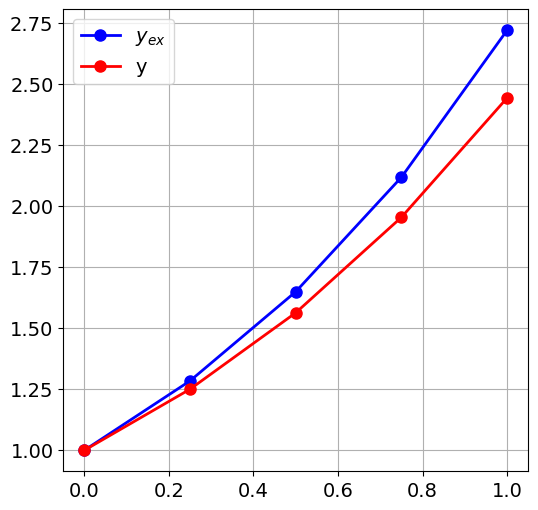

In [8]:
# Plot it
plt.figure()
plt.plot(ts, ys_ex, 'bo-')
plt.plot(ts, ys_eul, 'ro-')
plt.legend(["$y_{ex}$", "y" ])

Plot the solution for various $N_t$,
say $N_t = 4, 8, 16, 32$ against the exact solution given in 
{prf:ref}`exa-pop-growth-ode`.

:::{exercise} Error study for the Euler's method
:label: ode:exe:euler-error-study

We observed that the more we decrease the constant step size $\tau$ (or increase $N_{\mathrm{max}}$),
the closer the numerical solution gets to the exact solution.

Now we ask you to quantify this. More precisely,
write some code to compute the error

$$
\max_{i \in \{0, \ldots, N_{\mathrm{max}}\}} |y(t_i) - y_i|
$$

for $N_{\mathrm{max}} = 4, 8, 16, 32, 64, 128$.
How does the error reduces if you double the number of points?

:::

Complete the following code outline by filling in the missing
code indicated by `...`.

```{code-block} python
def error_study(y0, t0, T, f, Nmax_list, solver, y_ex):
    """
    Performs an error study for a given ODE solver by computing the maximum error 
    between the numerical solution and the exact solution for different values of Nmax.
    Returns list of error reduction rates computed from two consecutively solves.

    Parameters:
      y0 : Initial condition.
      t0 : Initial time.
      T (float): Final time.
      f (function): Function representing the ODE.
      Nmax_list (list of int): List of maximum number of steps to use in the solver.
      solver (function): Numerical solver function.
      y_ex (function): Exact solution function.

    Returns:
      numpy.ndarray: Array of error reduction rates computed from two consecutive solves.
    """
    max_errs = []
    for Nmax in Nmax_list:
        # Compute list of timestep ts and computed solution ys
        ts, ys = ...
        # Evaluate y_ex in ts
        ys_ex = ...
        # Compute max error for given solution and print it
        max_errs.append(...)
        print(f"For Nmax = {Nmax:3}, max ||y(t_i) - y_i||= {max_errs[-1]:.3e}")
    max_errs = np.array(max_errs)
    return ...

# Define list for N_max
Nmax_list = [4, 8, 16, 32, 64, 128]
# Run error study
rates = error_study(y0, t0, T, f, Nmax_list, explicit_euler, y_ex)
print("The computed error reduction rates are")
print(rates)
```

:::{solution-start} ode:exe:euler-error-study 
:::

In [9]:
def error_study(y0, t0, T, f, Nmax_list, solver, y_ex):
    max_errs = []
    for Nmax in Nmax_list:
        ts, ys = solver(y0, t0, T, f, Nmax)
        ys_ex = y_ex(ts)
        errors = ys - ys_ex
        max_errs.append(np.abs(errors).max())
        print(f"For Nmax = {Nmax:3}, max ||y(t_i) - y_i||= {max_errs[-1]:.3e}")
    max_errs = np.array(max_errs)
    return max_errs[:-1]/max_errs[1:]

Nmax_list = [4, 8, 16, 32, 64, 128]
rates = error_study(y0, t0, T, f, Nmax_list, explicit_euler, y_ex)
print("The computed error reduction rates are")
print(rates)

For Nmax =   4, max ||y(t_i) - y_i||= 2.769e-01
For Nmax =   8, max ||y(t_i) - y_i||= 1.525e-01
For Nmax =  16, max ||y(t_i) - y_i||= 8.035e-02
For Nmax =  32, max ||y(t_i) - y_i||= 4.129e-02
For Nmax =  64, max ||y(t_i) - y_i||= 2.094e-02
For Nmax = 128, max ||y(t_i) - y_i||= 1.054e-02
The computed error reduction rates are
[1.81560954 1.89783438 1.94599236 1.97219964 1.98589165]


:::{solution-end}
:::

### Heun's method
Before we start looking at more exciting examples, we will derive a one-step method that is more accurate than Euler's method. Note that Euler's method can be interpreted as being based on a quadrature rule with a degree of exactness equal to 0. Let's try to use a better quadrature rule!

Again, we start from the *exact representation*, but this time we use the trapezoidal rule, which has a degree of exactness equal to $1$, yielding

\begin{align*}
y(t_{k+1}) - y(t_k)
&=
\int_{t_k}^{t_{k+1}} f(t,y(t)) {\,\mathrm{d}t}
\approx
\dfrac{\tau_k}{2}
\left(
f(t_{k+1}, y(t_{k+1})
+
f(t_{k}, y(t_{k})
\right)
\end{align*}

This suggest to consider the scheme

\begin{align*}
y_{k+1} - y_k
&=
\dfrac{\tau_k}{2}
\left(
f(t_{k+1}, y_{k+1})
+
f(t_{k}, y_{k})
\right)
\end{align*}

But note that starting from $y_k$, we cannot immediately compute $y_{k+1}$
as it appears also in the expression $f(t_{k+1}, y_{k+1})$!
This is an example of an **implicit method**!

To turn this scheme into an **explicit** scheme, the idea is now to
approximate $y_{k+1}$ appearing in $f$ with an explicit Euler step:

$$
\begin{align*}
y_{k+1}
&=
y_k +
\dfrac{\tau_k}{2}
\left(
f\bigl(t_{k+1}, y_{k}+\tau_k f(t_k, y_k)\bigr)
+
f(t_{k}, y_k)
\right).
\end{align*}
$$

Observe that we have now nested evaluations of $f$. This can be best
arranged by computing the nested expression in stages, first
the inner one and then the outer one.
This leads to the following recipe.

:::{prf:algorithm} Algorithm Heun's method

Given a function $f(t,y)$ and an initial value $(t_0,y_0)$.
* Set $t = t_0$.

* $\texttt{while } t < T$:

  * Choose $\tau_k$

  * Compute stage $k_1 := f(t_k, y_k)$

  * Compute stage $k_2 := f(t_k+\tau_k, y_k+\tau_k k_1)$

  * $\displaystyle y_{k+1} := y_{k} + \tfrac{\tau_k}{2}(k_1 + k_2)$ 

  * $t_{k+1}:=t_k+\tau_k$

  * $t := t_{k+1}$

  :::

The function `heun` can be implemented as follows:

In [10]:
def heun(y0, t0, T, f, Nmax):
    ys = [y0]
    ts = [t0]
    dt = (T - t0)/Nmax
    while(ts[-1] < T):
        t, y = ts[-1], ys[-1]
        k1 = f(t,y)
        k2 = f(t+dt, y+dt*k1)
        ys.append(y + 0.5*dt*(k1+k2))
        ts.append(t + dt)
    return (np.array(ts), np.array(ys))

:::{exercise} Comparing Heun with Euler
:label: exe:heun_vs_euler
:::

**a)**
Redo the {prf:ref}:`ode:exa:exponential` with Heun, and plot
both the exact solution, $y_{eul}$ and $y_{heun}$
for $N_t = 4, 8, 16, 32$.

**b)**
Redo {ref}`ode:exe:euler-error-study` with Heun.

:::

In [ ]:
# Insert code here.

**Solution.**

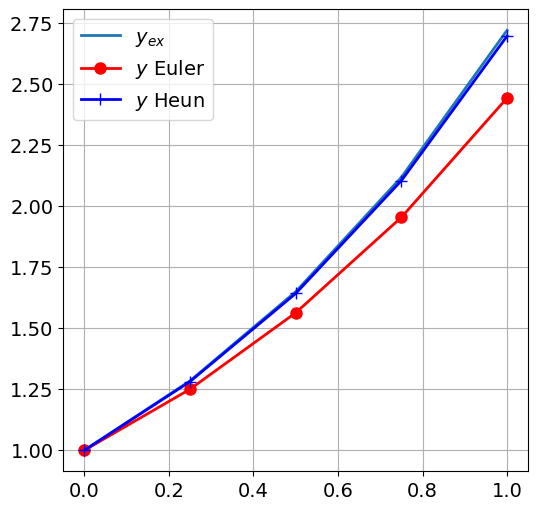

In [11]:
t0, T = 0, 1
y0 = 1
lam = 1
Nmax = 4

# rhs of IVP
f = lambda t,y: lam*y

# Compute numerical solution using Euler and Heun
ts, ys_eul = explicit_euler(y0, t0, T, f, Nmax)
ts, ys_heun = heun(y0, t0, T, f, Nmax)

# Exact solution to compare against
y_ex = lambda t: y0*np.exp(lam*(t-t0))
ys_ex = y_ex(ts)

# Plot it
plt.figure()
plt.plot(ts, ys_ex)
plt.plot(ts, ys_eul, 'ro-')
plt.plot(ts, ys_heun, 'b+-')
plt.legend(["$y_{ex}$", "$y$ Euler", "$y$ Heun" ])

<!-- --- end solution of exercise --- -->

In [ ]:
# Insert code here.

<!-- --- begin solution of exercise --- -->
**Solution.**

In [12]:
Nmax_list = [4, 8, 16, 32, 64, 128]
error_study(y0, t0, T, f, Nmax_list, heun, y_ex)

For Nmax =   4, max ||y(t_i) - y_i||= 2.343e-02
For Nmax =   8, max ||y(t_i) - y_i||= 6.441e-03
For Nmax =  16, max ||y(t_i) - y_i||= 1.688e-03
For Nmax =  32, max ||y(t_i) - y_i||= 4.322e-04
For Nmax =  64, max ||y(t_i) - y_i||= 1.093e-04
For Nmax = 128, max ||y(t_i) - y_i||= 2.749e-05


array([3.63726596, 3.81482383, 3.9067187 , 3.95322679, 3.97658594])

### Applying Heun's and Euler's method

:::{prf:example} The Lotka-Volterra equation revisited
:label: ode:exa-lotka-volterra-revisit

Solve the Lotka-Volterra equation

\begin{align*}
y'(t) &= \alpha y(t) - \beta y(t) z(t) \\ 
z'(t) &= \delta y(t)z(t) - \gamma z(t)
\end{align*}

In this example, use the parameters and initial values

$$
\alpha=2,\quad \beta=1, \quad \delta=0.5,\quad \gamma=1, \qquad y_{1,0}=2,
\quad y_{2,0} = 0.5.
$$

User Euler's method to solve the equation over the interval $[0,20]$,
and use $\tau=0.02$.
Try also other step sizes, e.g. $\tau=0.1$ and $\tau=0.002$. 

:::

:::{note}
In this case, the exact solution is not known.  What is known is
that the solutions are periodic and positive. Is this the case here?
Check for different values of $\tau$.
:::

Nmax =  200
Nmax =  200


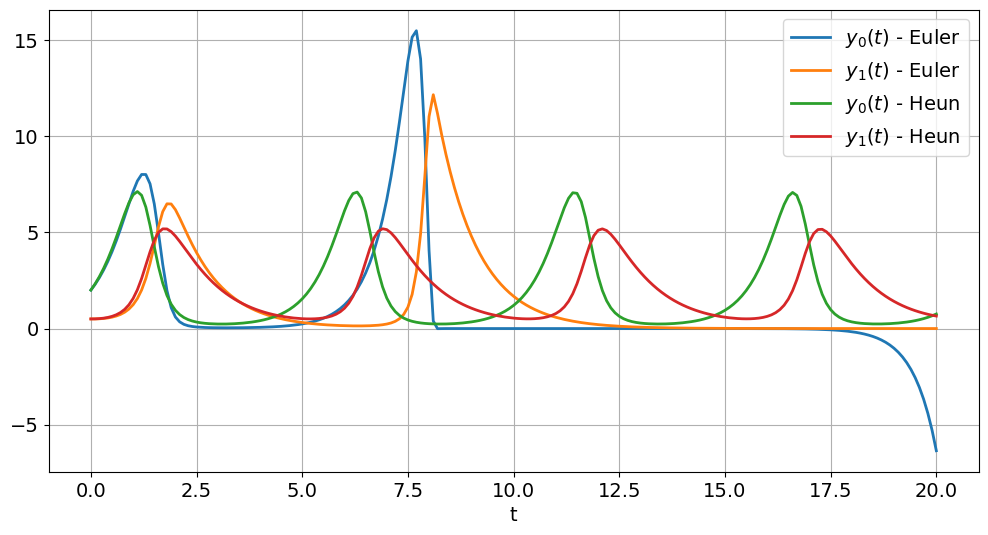

In [18]:
# Reset plotting parameters
plt.rcParams.update({'figure.figsize': (12,6)})

# Define rhs
def lotka_volterra(t, y):
    # Set parameters
    alpha, beta, delta, gamma = 2, 1, 0.5, 1  
    # Define rhs of ODE
    dy = np.array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

t0, T = 0, 20            # Integration interval
y0 = np.array([2, 0.5])  # Initital values

# Solve the equation
tau = 0.1  
Nmax = int(20/tau)
print("Nmax = {:4}".format(Nmax))
ts, ys_eul = explicit_euler(y0, t0, T, lotka_volterra, Nmax)

# Plot results
plt.figure()
plt.plot(ts, ys_eul)

# Solve the equation
tau = 0.1 
Nmax = int(20/tau)
print("Nmax = {:4}".format(Nmax))
ts, ys_heun = heun(y0, t0, T, lotka_volterra, Nmax)

plt.plot(ts, ys_heun)
plt.xlabel('t')
plt.legend(['$y_0(t)$ - Euler', '$y_1(t)$ - Euler', '$y_0(t)$ - Heun', '$y_1(t)$ - Heun'],
        loc="upper right" )

:::{exercise} Solving the Lotka-Volterra system using Heun's method
:label: exe:lotka_volterra_with_heun

Redo the previous example with Heun's method and compare the solutions
generated by Euler's and Heun's method.

:::

### Higher order ODEs
How can we numerically solve higher order ODEs
using, e.g., Euler's or Heun's method?

Given the $m$-th order ODE

$$
u^{(m)}(t) = f\big(t, u(t), u'(x), \dotsc, u^{(m-1)}\big).
$$

For a unique solution, we assume that the initial values

$$
u(t_0), u'(t_0), u''(t_0), \dotsc, u^{(m-1)}(t_0)
$$

are known.

Such equations can be written as a system of first order ODEs by the
following trick:
Let

$$
y_1(x) = u(x), \quad y_2(x) = u'(x), \quad
y_3(x) = u^{(2)}(x), \quad \dotsc \quad, y_{m}(x) = u^{(m-1)}(x)
$$

such that

\begin{align*}
  y_1' &= y_2, & y_1(a) &= u(a) \\ 
  y_2' &= y_3, & y_2(a) &= u'(a) \\ 
       & \vdots  && \vdots\\ 
  y_{m-1}' &= y_m, & y_{m-1}(a) &= u^{(m-2)}(a) \\ 
  y_m' &= f(t, y_1, y_2, \ldots, y_{m-1},y_m), & y_m(a) &= u^{(m-1)}(a)
\end{align*}

which is nothing but a system of first order ODEs, and can be solved numerically
exactly as before.

:::{exercise-start} Numerical solution of Van der Pol's equation
:label: exe:van-der-pol-numerics
:::

Recalling {prf:ref}`ode:exa:van-der-pol`, the Van der Pol oscillator
is described by the second order differential equation

$$
u'' = \mu (1-u^2)u' - u, \qquad u(0)=u_0, \quad u'(0)=u_0'.
$$

It can be rewritten as a system of first order ODEs:

\begin{align*}
y_1' &= y_2, & y_1(0) &= u_0,  \\ 
y_2' &= \mu(1-y_1^2)y_2 - y_1, & y_2(0) &= u_0'.
\end{align*}

**a)**
Let  $\mu=2$, $u(0)=2$ and $u'(0)=0$ and solve the equation over the interval
$[0,20]$, using the explicit Euler and $\tau=0.1$. Play with different
step sizes, and maybe also with different values of $\mu$.

**b)**
Repeat the previous numerical experiment with Heun's method.
Try to compare the number of steps you need to perform
with Euler vs Heun to obtain visually the "same" solution.
(That is, you measure the difference of the two numerical solutions
in the "eyeball norm".)

:::{exercise-end}
:::

In [ ]:
# Insert code here.

:::{solution-start} exe:van-der-pol-numerics
:::

Nmax = 1000
Nmax = 1000


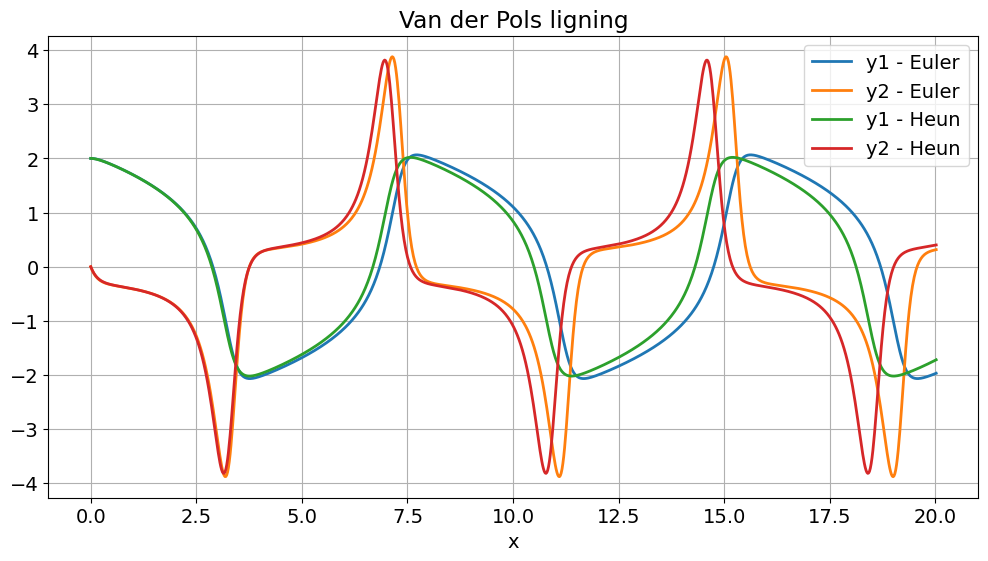

In [21]:
# Define the ODE
def f(t, y):
    mu = 2
    dy = np.array([y[1],
                mu*(1-y[0]**2)*y[1]-y[0] ])
    return dy

# Set initial time, stop time and initial value
t0, T - 0, 20
y0 = np.array([2,0])

# Solve the equation using Euler and plot
tau = 0.02
Nmax = int(20/tau)
print("Nmax = {:4}".format(Nmax))
ts, ys_eul  = explicit_euler(y0, t0, T, f, Nmax)

plt.figure()
plt.plot(ts,ys_eul);

# Solve the equation using Heun
tau = 0.02
Nmax = int(20/tau)
print("Nmax = {:4}".format(Nmax))
ts, ys_heun = heun(y0, t0, T, f, Nmax)

plt.plot(ts,ys_heun);
plt.xlabel('x')
plt.title('Van der Pols ligning')
plt.legend(['y1 - Euler','y2 - Euler', 'y1 - Heun','y2 - Heun'],loc='upper right');

:::{solution-end}
:::